In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats

In [2]:
pd.set_option('display.max_colwidth', 200)
us_topics = pd.read_csv('data/cdc_npao_topics_us.csv')
us_data = pd.read_csv('data/cdc_npao_us.csv')

In [3]:
us_topics.head(1)

,Class,Topic,Question,Short_Desc,ClassID,TopicID,QuestionID
0,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit less than one time daily,NoFruit,FV,FV1,Q018


In [4]:
us_data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [5]:
us_data = us_data.drop(['LocationAbbr', 'Datasource', 'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 
                        'Data_Value_Footnote','YearEnd', 'Class','Topic','Data_Value_Type','ClassID',
                       'TopicID','QuestionID','DataValueTypeID','StratificationCategoryId1'],1)

q = ['Percent of adults aged 18 years and older who have obesity']

In [6]:
us_data.head(2)

,YearStart,LocationDesc,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1,StratificationID1
0,2011,Alabama,Percent of adults aged 18 years and older who have obesity,32.0,32.0,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Total,Total,OVERALL
1,2011,Alabama,Percent of adults aged 18 years and older who have obesity,32.3,32.3,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Male,MALE


In [7]:
test1 = us_data[(us_data['YearStart'] == 2011)&(us_data['Question'] == q[0])&(us_data['StratificationID1'] == 'OVERALL')]
    
test1[test1['LocationDesc']=='National']['Sample_Size']

18264    470700.0
Name: Sample_Size, dtype: float64

In [8]:
#finding the national adult obseity % for each year, 2011 - 2015
national_ob = us_data[(us_data['LocationDesc'] == 'National') & (us_data['Question'] == q[0]) & 
                     (us_data['StratificationCategory1'] == 'Total')]
national_ob.set_index('YearStart', inplace = True)
national_ob = national_ob.sort_index()
national_ob_lst = national_ob['Data_Value'].values.tolist()
national_ob['Data_Value'].mean()

28.24

### Finding national % of adults with obesity, comparing to all states across all years

In [9]:
national_ob.head()

,LocationDesc,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1,StratificationID1
YearStart,,,,,,,,,,,,,,,,,,
2011,National,Percent of adults aged 18 years and older who have obesity,27.4,27.4,27.2,27.7,470700.0,Total,NaN,NaN,NaN,NaN,NaN,NaN,59,Total,Total,OVERALL
2012,National,Percent of adults aged 18 years and older who have obesity,27.7,27.7,27.4,28.0,442230.0,Total,NaN,NaN,NaN,NaN,NaN,NaN,59,Total,Total,OVERALL
2013,National,Percent of adults aged 18 years and older who have obesity,28.3,28.3,28.0,28.6,457487.0,Total,NaN,NaN,NaN,NaN,NaN,NaN,59,Total,Total,OVERALL
2014,National,Percent of adults aged 18 years and older who have obesity,28.9,28.9,28.6,29.2,425875.0,Total,NaN,NaN,NaN,NaN,NaN,NaN,59,Total,Total,OVERALL
2015,National,Percent of adults aged 18 years and older who have obesity,28.9,28.9,28.6,29.1,398316.0,Total,NaN,NaN,NaN,NaN,NaN,NaN,59,Total,Total,OVERALL


In [10]:
#2011 %obseity weighted mean across all states using 'total'
df_wt_11 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2011) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2011_mean = (df_wt_11['Data_Value']*df_wt_11['Sample_Size']).sum()/df_wt_11['Sample_Size'].sum()
n_2011_mean

27.43593392819205

In [11]:
#2012 %obseity weighted mean across all states using 'total'
df_wt_12 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2012) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2012_mean = (df_wt_12['Data_Value']*df_wt_12['Sample_Size']).sum()/df_wt_12['Sample_Size'].sum()
n_2012_mean

27.817704814236933

In [12]:
#2013 %obseity weighted mean across all states using 'total'
df_wt_13 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2013) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2013_mean = (df_wt_13['Data_Value']*df_wt_13['Sample_Size']).sum()/df_wt_13['Sample_Size'].sum()
n_2013_mean

28.317782661160628

In [13]:
#2014 %obseity weighted mean across all states using 'total'
df_wt_14 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2014) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2014_mean = (df_wt_14['Data_Value']*df_wt_14['Sample_Size']).sum()/df_wt_14['Sample_Size'].sum()
n_2014_mean

29.044841118049632

In [14]:
#2015 %obseity weighted mean across all states using 'total'
df_wt_15 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2015) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2015_mean = (df_wt_15['Data_Value']*df_wt_15['Sample_Size']).sum()/df_wt_15['Sample_Size'].sum()
n_2015_mean

29.072455302697392

In [15]:
weighted_national_mean = [n_2011_mean, n_2012_mean, n_2013_mean, n_2014_mean, n_2015_mean]
weighted_national_mean

[27.43593392819205,
 27.817704814236933,
 28.317782661160628,
 29.044841118049632,
 29.072455302697392]

In [16]:
#using the 'National' filter to find national %obesity mean
def find_national_mean(df, year:int, q):
    df_1 = df[(df['LocationDesc']=='National')]
    df_2 = df_1[(df_1['Question'] == q[0]) & (df_1['YearStart'] == year) & (df_1['StratificationCategory1'] == 'Total')]
    return df_2['Data_Value'].values


In [17]:
n_mean = [] #list of national mean %obesity from 2011 - 2015
for i in range(2011, 2016):
    n_mean.append(find_national_mean(us_data, i, q))

In [18]:
n_mean #the weighted mean for each year is: 27.4359, 27.8177, 28.3178, 29.0448, 29.0725]

[array([27.4]), array([27.7]), array([28.3]), array([28.9]), array([28.9])]

In [19]:
#national mean across all years 
m = sum(n_mean)/len(n_mean)

In [20]:
#weighted by national population, national mean for years 2011 - 2015

(national_ob['Data_Value']*national_ob['Sample_Size']).sum()/national_ob['Sample_Size'].sum()

28.21139492793246

In [21]:
# finding top/bottom 5 states of obseity for each year% 

def find_state_mean(df, year, q):
    df_filtered = df[~(df['LocationDesc']=='National')]
    df_2 = df_filtered[(df_filtered['Question'] == q[0]) & (df_filtered['YearStart'] == year) & (df_filtered['StratificationCategory1'] == 'Total')]
    return df_2[['LocationDesc','Data_Value']].sort_values(['Data_Value'], ascending = True)

In [22]:
#%obesity mean for all states in different years
state_2011 = find_state_mean(us_data, 2011, q)
state_2012 = find_state_mean(us_data, 2012, q)
state_2013 = find_state_mean(us_data, 2013, q)
state_2014 = find_state_mean(us_data, 2014, q)
state_2015 = find_state_mean(us_data, 2015, q)

state_2015.head()

,LocationDesc,Data_Value
46058,Colorado,20.2
46222,District of Columbia,22.1
46388,Hawaii,22.7
47226,Montana,23.6
46004,California,24.2


In [23]:
dfs = [state_2011, state_2012, state_2013, state_2014, state_2015]    

dfs[4].iloc[:5,1] #getting the top 5 state with the least %obesity in their populaiton for 2015

46058    20.2
46222    22.1
46388    22.7
47226    23.6
46004    24.2
Name: Data_Value, dtype: float64

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

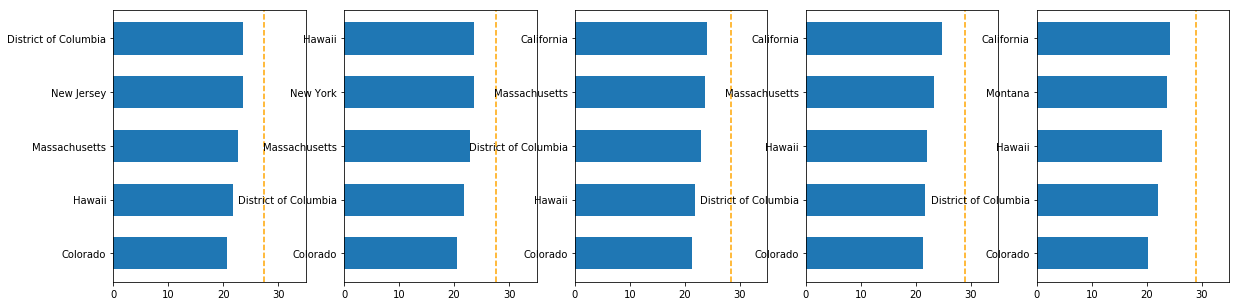

In [24]:
#5 least obese states for years 2011 to 2015, weighted national avg for each year is marked in orange
dfs = [state_2011, state_2012, state_2013, state_2014, state_2015]    

fig, axs = plt.subplots(1,5, figsize = (20,5))
x = np.linspace(20, 37, num=16)

for idx, ax in enumerate(axs.flatten()):
    ax.barh(dfs[idx].iloc[:5,0], dfs[idx].iloc[:5,1], height=0.6)
    ax.axvline(n_mean[idx], linestyle='--', color='orange')
    ax.set_xlim(None, 35)

plt.tight_layout


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

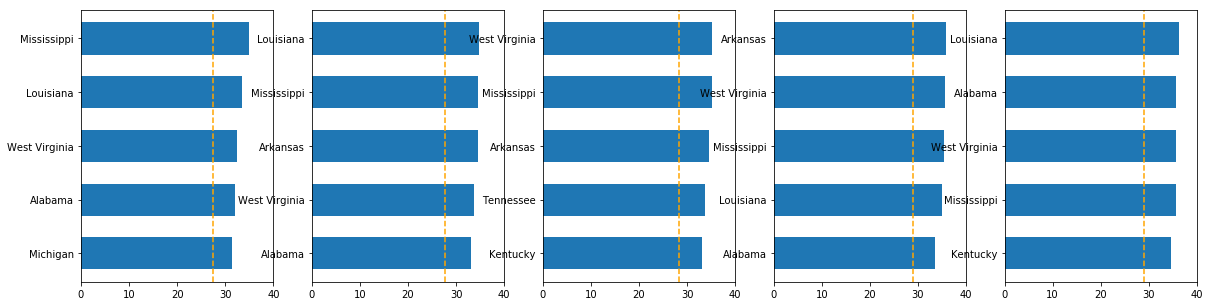

In [25]:
#5 most obese states from 2011 to 2015, weighted national avg for each year is marked in orange
dfs = [state_2011, state_2012, state_2013, state_2014, state_2015]    

fig, axs = plt.subplots(1,5, figsize = (20,5))
x = np.linspace(20, 37, num=16)

for idx, ax in enumerate(axs.flatten()):
    ax.barh(dfs[idx].iloc[-5:,0], dfs[idx].iloc[-5:,1], height=0.6)
    ax.axvline(n_mean[idx], linestyle='--', color='orange')
    ax.set_xlim(None, 40)

plt.tight_layout

### GENDER

In [26]:
#focusing on gender, excluding 'National', 'Guam', 'Puerto Rico' 
us_gender = us_data[(us_data['Question'] == q[0]) & (us_data['StratificationCategory1'] == 'Gender') 
                    & ~(us_data['LocationDesc']=='National')&~(us_data['LocationDesc']=='Guam')
                    &~(us_data['LocationDesc']=='Puerto Rico')]

In [27]:
#finding the national female obseity % for each year, 2011 - 2015
#finding national female %obesity mean across all years
n_female_fiveyr = us_data[(us_data['LocationDesc'] == 'National')&(us_data['Question'] == q[0])
                        &(us_data['StratificationID1'] == 'FEMALE')]
n_female_fiveyr.set_index('YearStart', inplace = True)
n_female_fiveyr = n_female_fiveyr.sort_index()
n_female_fiveyr_lst = n_female_fiveyr['Data_Value'].values.tolist()
n_female_fiveyr['Data_Value'].mean() #national female %obesity mean
n_female_fiveyr[['Question','LocationDesc','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

,Question,LocationDesc,Data_Value,Sample_Size,StratificationCategory1,Stratification1
YearStart,,,,,,
2011,Percent of adults aged 18 years and older who have obesity,National,27.1,278712.0,Gender,Female
2012,Percent of adults aged 18 years and older who have obesity,National,27.4,257190.0,Gender,Female
2013,Percent of adults aged 18 years and older who have obesity,National,28.3,263276.0,Gender,Female
2014,Percent of adults aged 18 years and older who have obesity,National,28.8,242169.0,Gender,Female
2015,Percent of adults aged 18 years and older who have obesity,National,28.6,221909.0,Gender,Female


In [28]:
#finding weighted mean across all states for each year, female
def weighted_f_mean (df, year):
    test_f = df[(df['Stratification1']=='Female')&(df['YearStart']==year)]
    test_f_mean = (test_f['Data_Value']*test_f['Sample_Size']).sum()/test_f['Sample_Size'].sum()
    return test_f_mean
years = [2011, 2012, 2013, 2014, 2015]
lst_weighted_f_mean = []
for year in years:
    lst_weighted_f_mean.append(weighted_f_mean(us_gender, year)) 

lst_weighted_f_mean #comparing to the "National" female %obesity shown in the cell above, the two results are close but not the same

[27.05274584517351,
 27.560455305416227,
 28.069373964964523,
 28.79946483653977,
 28.6118557606947]

(array([ 7.,  7., 38., 38., 37., 49., 36., 24., 10.,  9.]),
 array([18.7 , 20.62, 22.54, 24.46, 26.38, 28.3 , 30.22, 32.14, 34.06,
        35.98, 37.9 ]),
 <a list of 10 Patch objects>)

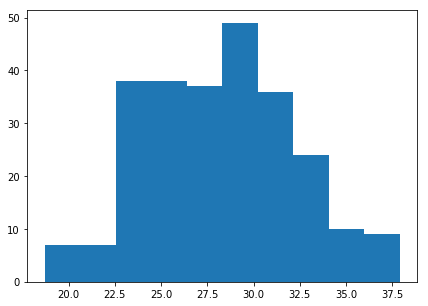

In [29]:
#the mean from this histogram should NOT be used due the different weight in population across states
us_gender_female = us_gender[us_gender['Stratification1'] == 'Female']
female_obesity = us_gender_female['Data_Value'].values

bins = [20,25,30,35,40]
#x = np.linspace(19,40,num=25)
fig, ax = plt.subplots(figsize = (7,5))
ax.hist(female_obesity)


In [30]:
#finding the national male obseity % for each year, 2011 - 2015
#finding national male %obeisty mean across all years
n_male_fiveyr = us_data[(us_data['LocationDesc'] == 'National') & (us_data['Question'] == q[0]) 
        & (us_data['StratificationCategory1'] == 'Gender') & (us_data['Stratification1'] == 'Male')]
n_male_fiveyr.set_index('YearStart', inplace = True)
n_male_fiveyr = n_male_fiveyr.sort_index()
n_male_fiveyr_lst = n_male_fiveyr['Data_Value'].values.tolist()
n_male_fiveyr['Data_Value'].mean() #national male %obesity mean
n_male_fiveyr[['Question','LocationDesc','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

,Question,LocationDesc,Data_Value,Sample_Size,StratificationCategory1,Stratification1
YearStart,,,,,,
2011,Percent of adults aged 18 years and older who have obesity,National,27.8,191988.0,Gender,Male
2012,Percent of adults aged 18 years and older who have obesity,National,28.0,185040.0,Gender,Male
2013,Percent of adults aged 18 years and older who have obesity,National,28.3,194211.0,Gender,Male
2014,Percent of adults aged 18 years and older who have obesity,National,29.0,183706.0,Gender,Male
2015,Percent of adults aged 18 years and older who have obesity,National,29.1,176407.0,Gender,Male


In [31]:
male_tsize = 191988.0
male_nob = 27.8/100*male_tsize

female_tsize = 278712.0
female_nob = 27.1/100*female_tsize

gender_tsize = male_tsize + female_tsize # for 2011

In [32]:
shared_sample_freq_g = (male_nob + female_nob) / gender_tsize
shared_sample_variance_g = gender_tsize * (shared_sample_freq_g * (1 - shared_sample_freq_g)) / (male_tsize*female_tsize)

difference_in_proportions_g = stats.norm(0, np.sqrt(shared_sample_variance_g))

In [33]:
male_sample_freq = male_nob / male_tsize
female_sample_freq = female_nob / female_tsize
difference_in_sample_proportions_g = male_sample_freq - female_sample_freq


p_value = 1 - difference_in_proportions_g.cdf(difference_in_sample_proportions_g)
print("p-value for gender frequency comparison: {:2.10f}".format(p_value))


p-value for gender frequency comparison: 0.0000000603


(array([ 4.,  5.,  4., 25., 41., 65., 52., 35., 20.,  4.]),
 array([17.6 , 19.58, 21.56, 23.54, 25.52, 27.5 , 29.48, 31.46, 33.44,
        35.42, 37.4 ]),
 <a list of 10 Patch objects>)

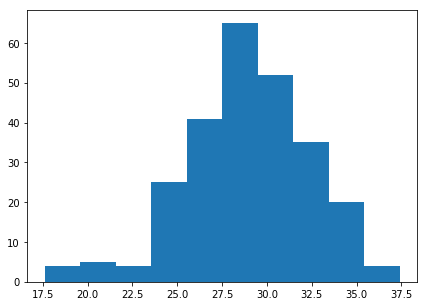

In [34]:
#the mean from this historgram should NOT be used due to the population weight difference across states
us_gender_male = us_gender[us_gender['Stratification1'] == 'Male']
male_obesity = us_gender_male['Data_Value'].values

#bins = [20,25,30,35,40]
#x = np.linspace(19,40,num=25)
fig, ax = plt.subplots(figsize = (7,5))
ax.hist(male_obesity)


In [35]:
#finding the national weighted %obesity mean based on male & female
(((n_female_fiveyr['Sample_Size']*n_female_fiveyr['Data_Value']).sum()
  + (n_male_fiveyr['Sample_Size']*n_male_fiveyr['Data_Value']).sum())
 /(n_female_fiveyr['Sample_Size'].sum() + n_male_fiveyr['Sample_Size'].sum()))
                                               
#this weighted national mean for 5 years is relatively similar to the mean calculated from using the "National" filter
#mean from "National" filter = 28.2
                                               

28.18150302924258

Text(0.5,1,'% of Adults Who Have Obesity in the US, 2011-2015')

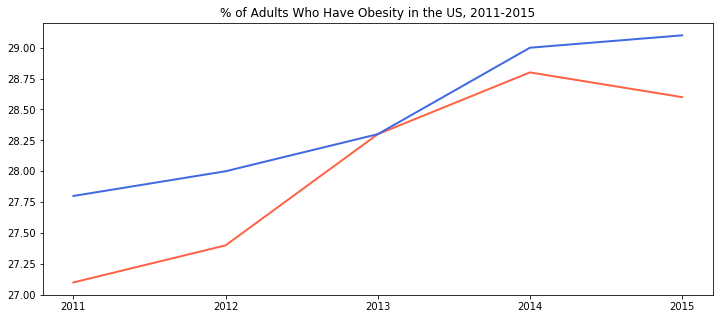

In [36]:
fig, ax = plt.subplots(figsize = (12, 5))
x = n_female_fiveyr['Data_Value'].index.values
y_f = n_female_fiveyr['Data_Value'].values
y_m = n_male_fiveyr['Data_Value'].values
ax.plot(x, y_f, linewidth=2, color='tomato')
ax.plot(x, y_m, linewidth=2, color='royalblue')

ax.set_xticks(x)
ax.set_title('% of Adults Who Have Obesity in the US, 2011-2015')

### INCOME 

In [37]:
income_states = us_data[(us_data['StratificationCategory1'] == 'Income') & (us_data['Question'] == q[0]) 
                            & ~(us_data['LocationDesc']=='National')&~(us_data['LocationDesc']=='Guam')
                            &~(us_data['LocationDesc']=='Puerto Rico')]
income_states = income_states.reset_index(drop = True)

income_national = us_data[(us_data['StratificationCategory1'] == 'Income') & (us_data['Question'] == q[0]) 
                            & (us_data['LocationDesc']=='National')]
income_national.head(2)

,YearStart,LocationDesc,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1,StratificationID1
18197,2011,National,Percent of adults aged 18 years and older who have obesity,31.3,31.3,30.6,32.0,74049.0,NaN,NaN,NaN,NaN,"$15,000 - $24,999",NaN,NaN,59,Income,"$15,000 - $24,999",INC1525
18250,2011,National,Percent of adults aged 18 years and older who have obesity,32.3,32.3,31.4,33.2,49598.0,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,NaN,59,Income,"Less than $15,000",INCLESS15


In [38]:
#finding the average %obesity across all states for 2013, based on 'National' filter in the dataset
income_n_2013 = income_national[income_national['YearStart']==2013]
income_n_2013 = income_n_2013[['YearStart','LocationDesc','Data_Value','Sample_Size','Stratification1']]
income_n_2013 = income_n_2013[~(income_n_2013['Stratification1']=='Data not reported')]
income_n_2013

,YearStart,LocationDesc,Data_Value,Sample_Size,Stratification1
18583,2013,National,33.6,46889.0,"Less than $15,000"
18584,2013,National,32.3,71389.0,"$15,000 - $24,999"
18585,2013,National,29.8,46125.0,"$25,000 - $34,999"
18586,2013,National,30.0,58655.0,"$35,000 - $49,999"
18587,2013,National,28.8,62562.0,"$50,000 - $74,999"
18588,2013,National,23.9,111798.0,"$75,000 or greater"


In [39]:
#putting into function, return national average %obesity across all states, found based on 'National' filter
def income_national_ob(df, year):
    df1 = df[df['YearStart']==year]
    df1 = df1[['Data_Value','Sample_Size','Stratification1']]
    df1 = df1[~(df1['Stratification1']=='Data not reported')].sort_values(by='Data_Value')
    #df2 = df1.reset_index(inplace=True)
    df1.rename(columns={"Stratification1": "Income_Level", "Data_Value": str(year)+"_%Obesity", 
                       'Sample_Size':str(year)+'_Sample_Size'}, inplace=True)
    
    return df1

In [40]:
income_n_2011 = income_national_ob(income_national, 2011)
income_n_2011

,2011_%Obesity,2011_Sample_Size,Income_Level
18254,22.8,110120.0,"$75,000 or greater"
18253,28.4,64688.0,"$50,000 - $74,999"
18252,28.7,61354.0,"$35,000 - $49,999"
18251,29.5,48943.0,"$25,000 - $34,999"
18197,31.3,74049.0,"$15,000 - $24,999"
18250,32.3,49598.0,"Less than $15,000"


In [41]:
income_n_2011 = income_national_ob(income_national, 2011)
income_n_2012 = income_national_ob(income_national, 2012)
income_n_2013 = income_national_ob(income_national, 2013)
income_n_2014 = income_national_ob(income_national, 2014)
income_n_2015 = income_national_ob(income_national, 2015)


df_income_n = income_n_2011.set_index('Income_Level').join(income_n_2012.set_index(
    'Income_Level')).join(income_n_2013.set_index('Income_Level')).join(income_n_2014.set_index('Income_Level')).join(income_n_2015.set_index('Income_Level'))

df_income_n #returns joined table with for years 2011-2015, income_leve vs %obesity


,2011_%Obesity,2011_Sample_Size,2012_%Obesity,2012_Sample_Size,2013_%Obesity,2013_Sample_Size,2014_%Obesity,2014_Sample_Size,2015_%Obesity,2015_Sample_Size
Income_Level,,,,,,,,,,
"$75,000 or greater",22.8,110120.0,23.4,107562.0,23.9,111798.0,25.1,112498.0,24.6,109789.0
"$50,000 - $74,999",28.4,64688.0,28.9,61143.0,28.8,62562.0,29.2,59297.0,29.9,54950.0
"$35,000 - $49,999",28.7,61354.0,28.5,57017.0,30.0,58655.0,30.7,54340.0,30.6,48843.0
"$25,000 - $34,999",29.5,48943.0,29.2,44721.0,29.8,46125.0,31.1,41727.0,32.1,36483.0
"$15,000 - $24,999",31.3,74049.0,31.6,69410.0,32.3,71389.0,32.2,62892.0,33.2,53993.0
"Less than $15,000",32.3,49598.0,33.1,46419.0,33.6,46889.0,35.2,39123.0,34.8,33296.0


In [42]:
#THIS IS NOT WEIGHTED AVERAGE, SHOULD NOT USE

# def obesity_income(df, year):
#     df1 = df[df['YearStart']==year]
#     df1 = df1[['YearStart','LocationDesc','Data_Value','Stratification1']]
#     df1 = df1[~(df1['Stratification1']=='Data not reported')]
#     df1_g = df1.groupby(by='Stratification1')['Data_Value'].mean().sort_values()
#     df1_g = df1_g.reset_index()
#     df1_g.rename(columns={"Stratification1": "Income_Level", "Data_Value": str(year)+"_%Obesity"}, inplace=True)
    
#     return df1_g

# income_2011 = obesity_income(income_states, 2011)
# income_2012 = obesity_income(income_states, 2012)
# income_2013 = obesity_income(income_states, 2013)
# income_2014 = obesity_income(income_states, 2014)
# income_2015 = obesity_income(income_states, 2015)
# df_income = income_2011.set_index('Income_Level').join(income_2012.set_index(
#     'Income_Level')).join(income_2013.set_index('Income_Level')).join(income_2014.set_index('Income_Level')).join(income_2015.set_index('Income_Level'))

In [43]:
#NOT WEIGTHED AVERAGE
df_income['Total_Avg'] = df_income.mean(axis=1)
df_income

NameError: name 'df_income' is not defined

In [ ]:
df_income_plt = df_income_n.iloc[:,0:9:2]
df_income_plt

In [ ]:
from statistics import mean 

inc_level = ['>75,000','50,000−74,999','35,000−49,999','25,000−34,999','15,000−24,999','<15,000']
# inc_2011 = df_income['2011_%Obesity'].values
# inc_2012 = df_income['2012_%Obesity'].values
# inc_2013 = df_income['2013_%Obesity'].values
# inc_2014 = df_income['2014_%Obesity'].values
# inc_2015 = df_income['2015_%Obesity'].values
m = sum(n_mean)/len(n_mean) #national mean %obesity, by averaging year 2011 - 2015
df_income_plt = df_income_n.iloc[:,0:9:2]
ax = df_income_plt.plot.barh(figsize = (15, 8))
ax.axvline(m, linestyle='--', color='black')
# df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
# >>> ax = df.plot.barh()

### hypothesis testing - income

effect of low vs high income level on % obesity in the population

- null: low (<25,000) and high (>50,000) has the same obesity rate
- alternate: low_income has higher obesity rate than high_income 

In [ ]:
# finding low income total sample and number of people with obesity, <25,000
# focusing on Louisiana, 2015

income_lou = income_states[(income_states['LocationDesc'] == 'Louisiana') & (income_states['YearStart']==2015)]
#income_lou['Stratification1'] = income_lou["Stratification1"].astype(str)
income_lou_low = income_lou[(income_lou['StratificationID1'] == 'INCLESS15') | (income_lou['StratificationID1'] == 'INC1525')]\

income_lou_low_tsize = income_lou_low['Sample_Size'].sum() #1244

income_lou_low_obsize = ((income_lou_low['Data_Value']/100)*income_lou_low['Sample_Size']).sum() #522.772
income_lou_low_nobsize = income_lou_low_tsize - income_lou_low_obsize #721.228

#income_lou

In [ ]:
# finding high income total sample and number of people with obesity >50,000
# focusing on Louisiana, 2015

income_lou_h = income_lou[(income_lou['StratificationID1'] == 'INC75PLUS') | (income_lou['StratificationID1'] == 'INC5075')]

income_lou_h_tsize = income_lou_h['Sample_Size'].sum() #1431
income_lou_h_obsize = ((income_lou_h['Data_Value']/100)*income_lou_h['Sample_Size']).sum()#475.287
income_lou_h_nobsize = income_lou_h_tsize - income_lou_h_obsize #955.713

# total number of samples for low and high income level
income_lou_tsize = income_lou_low_tsize + income_lou_h_tsize #2675.0
income_lou_tsize


- pl = P(low income with obesity)
- ph = P(high income with obesity)


- H0 : pl = ph
- Ha : pl > ph

In [ ]:
# shared_sample_freq = (income_lou_low_obsize + income_lou_h_obsize) / income_lou_tsize
# shared_sample_variance = income_lou_tsize * (shared_sample_freq * (1 - shared_sample_freq)) / (income_lou_low_tsize*income_lou_h_tsize)

# dif_in_prop = stats.norm(0, np.sqrt(shared_sample_variance))


In [ ]:
shared_sample_freq = (522.772+475.287)/2675
shared_sample_variance = 2675*(shared_sample_freq*(1-shared_sample_freq))/(1431*1244)

diff_in_prop = stats.norm(0, np.sqrt(shared_sample_variance))


In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, dif_in_prop.pdf(x), linewidth=3)
ax.set_xlim(-1, 1)

In [ ]:
low_sample_freq = income_lou_low_obsize / income_lou_low_tsize #0.42023
high_sample_freq = income_lou_h_obsize / income_lou_h_tsize #0.3321

diff_in_sample_prop = low_sample_freq - high_sample_freq #0.088098

print("Difference in sample proportions: {:2.2f}".format(diff_in_sample_prop))

In [ ]:
p_value = 1-diff_in_prop.cdf(diff_in_sample_prop)
print("p-value for obesity frequency comparison: {:2.10f}".format(p_value)) 


In [ ]:

us_obesity_income = us_obesity_income[['YearStart','LocationDesc','Data_Value','Stratification1']]
us_obesity_income["Stratification1"] = us_obesity_income["Stratification1"].astype(str)
us_obesity_income['Stratification1'] = us_obesity_income['Stratification1'].str.replace('$','')

ob_lowinc = us_obesity_income[(us_obesity_income['Stratification1'
                                                ] == 'Less than 15,000') | (us_obesity_income['Stratification1'] == '15,000 - 24,999')]

In [ ]:
ob_lowinc_d = ob_lowinc.drop('Stratification1', axis=1)
ob_lowinc_d['Data_Value'].values()

In [ ]:

plt.hist(ob_lowinc_d['Data_Value'].values)

### EDUCATION

In [ ]:
edu_obes_s = us_data[(us_data['StratificationCategory1'] == 'Education') & (us_data['Question'] == q[0]) 
                            & ~(us_data['LocationDesc']=='National')&~(us_data['LocationDesc']=='Guam')
                            &~(us_data['LocationDesc']=='Puerto Rico')]

edu_obes_s = edu_obes_s.reset_index(drop = True)

edu_obes_n = us_data[(us_data['StratificationCategory1'] == 'Education') & (us_data['Question'] == q[0]) 
                            & (us_data['LocationDesc']=='National')]

In [ ]:
#finding national %obesity for each year, using the 'National' filter

edu_n = edu_obes_n[edu_obes_n['YearStart']==2013]
edu_n = edu_n[['YearStart','LocationDesc','Data_Value','Stratification1']].sort_values(by='Data_Value')
#edu = edu.groupby(by='Stratification1')['Data_Value'].mean().sort_values()
edu_n = edu_n.reset_index()

edu_n.rename(columns={"Stratification1": "Education_Level", "Data_Value": "2013_%Obesity"})                                     
                                      
                                      


In [ ]:
#function for a DataFrame focusing on education level and %obesity for years 2011-2015, nationally
def obesity_edu(df, year):
    df1 = df[df['YearStart']==year]
    df1 = df1[['Sample_Size','Data_Value','Stratification1']].sort_values(by='Data_Value')
    #df1_g = df1.groupby(by='Stratification1')['Data_Value'].mean().sort_values()
    #df1 = df1.reset_index()
    df1.rename(columns={"Stratification1": "Education_Level", "Data_Value": str(year)+"_%Obesity", 
                       "Sample_Size": str(year)+"_Sample_Size"}, inplace=True)
    
    return df1



In [ ]:
edu_n_2011 = obesity_edu(edu_obes_n, 2011)
edu_n_2012 = obesity_edu(edu_obes_n, 2012)
edu_n_2013 = obesity_edu(edu_obes_n, 2013)
edu_n_2014 = obesity_edu(edu_obes_n, 2014)
edu_n_2015 = obesity_edu(edu_obes_n, 2015)
df_edu = edu_n_2011.set_index('Education_Level').join(edu_n_2012.set_index(
    'Education_Level')).join(edu_n_2013.set_index('Education_Level')).join(edu_n_2014.set_index('Education_Level')).join(edu_n_2015.set_index('Education_Level'))



In [ ]:
df_edu

welch t test

In [ ]:
college = df_edu.iloc[0,1:10:2].tolist()
hs = df_edu.iloc[2,1:10:2].tolist()
nohs = df_edu.iloc[3, 1:10:2].tolist()

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([hs, nohs])
ax.set_xticks([1,2])
ax.set_xticklabels(["high school", "no high school"])

In [ ]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [ ]:
test_statistic = welch_test_statistic(hs, nohs)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))


In [ ]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [ ]:
df = welch_satterhwaithe_df(hs, nohs)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))


In [ ]:
students = stats.t(df)

p_value_1 = students.cdf(test_statistic)
print("p-value for different average obesity rate: {:2.10f}".format(p_value_1))


In [ ]:
test_statistic = welch_test_statistic(nohs, college)
p_value_2 = 1 - students.cdf(test_statistic)

print("p-value for different average obesity rate: {:2.10f}".format(p_value_2))


null: population with 'less than high school' education level has same obesity rate compare to population with 'college graduate' education level

In [ ]:
# 2015, <hs vs college

college_tsize = df_edu['2015_Sample_Size'][0]
college_nob = df_edu['2015_Sample_Size'][0]*(df_edu['2015_%Obesity'][0]/100)

nohs_tsize = df_edu['2015_Sample_Size'][3]
nohs_nob = df_edu['2015_Sample_Size'][3]*(df_edu['2015_%Obesity'][3]/100)

total_sample_size = college_tsize + nohs_tsize

In [ ]:
shared_sample_freq_edu = (college_nob + nohs_nob) / total_sample_size
shared_sample_variance_edu = total_sample_size * (shared_sample_freq * (1 - shared_sample_freq)) / (college_tsize*nohs_tsize)

diff_in_prop_edu = stats.norm(0, np.sqrt(shared_sample_variance_edu))

In [ ]:
college_sample_freq = college_nob / college_tsize
nohs_sample_freq = nohs_nob / nohs_tsize

diff_in_sample_prop_edu = nohs_sample_freq - college_sample_freq
print('Difference in sample proportions: {:2.2f}'.format(diff_in_sample_prop_edu))

In [ ]:
p_val = 1 - diff_in_prop_edu.cdf(diff_in_sample_prop_edu)
print("p-value for obesity frequency comparison: {:2.10f}".format(p_value))


In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, diff_in_prop_edu.pdf(x), linewidth=3)
ax.set_xlim(-1, 1)

In [ ]:


hs_tsize = df_edu['2015_Sample_Size'][2]
hs_nob = df_edu['2015_Sample_Size'][2]*(df_edu['2015_%Obesity'][2]/100)

total_sample_size = nohs_tsize + hs_tsize

In [ ]:
shared_sample_freq_edu = (nohs_nob + hs_nob) / total_sample_size
shared_sample_variance_edu = total_sample_size * (shared_sample_freq_edu * (1 - shared_sample_freq_edu)) / (nohs_tsize*hs_tsize)

diff_in_prop_edu = stats.norm(0, np.sqrt(shared_sample_variance_edu))

In [ ]:
hs_sample_freq = hs_nob / hs_tsize

diff_in_sample_prop_edu = nohs_sample_freq - hs_sample_freq
print('Difference in sample proportions: {:2.2f}'.format(diff_in_sample_prop_edu))

In [ ]:
p_val = 1 - diff_in_prop_edu.cdf(diff_in_sample_prop_edu)
print("p-value for obesity frequency comparison: {:2.10f}".format(p_value))


importing fruit/veg consumption in california 

In [ ]:
fv = pd.read_csv('data/fv_consum_ca_2012_2013.csv')

In [ ]:
fv.head(10)